In [6]:
import xarray as xr
from netCDF4 import Dataset
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import time

In [3]:
ds = xr.open_mfdataset("precip.mon.mean.nc")
'''
Variables present in this file
lat(lat)
lon(lon)
time_bnds - time bounds for each time value
lat_bnds - latitude values at the north and south bounds of each pixel.
lon_bnds - longitude values at the west and east bounds of each pixel.
precip(time, lat, lon) - Average Monthly Rate of Precipitation
time
'''

'\nVariables present in this file\nlat(lat)\nlon(lon)\ntime_bnds - time bounds for each time value\nlat_bnds - latitude values at the north and south bounds of each pixel.\nlon_bnds - longitude values at the west and east bounds of each pixel.\nprecip(time, lat, lon) - Average Monthly Rate of Precipitation\ntime\n'

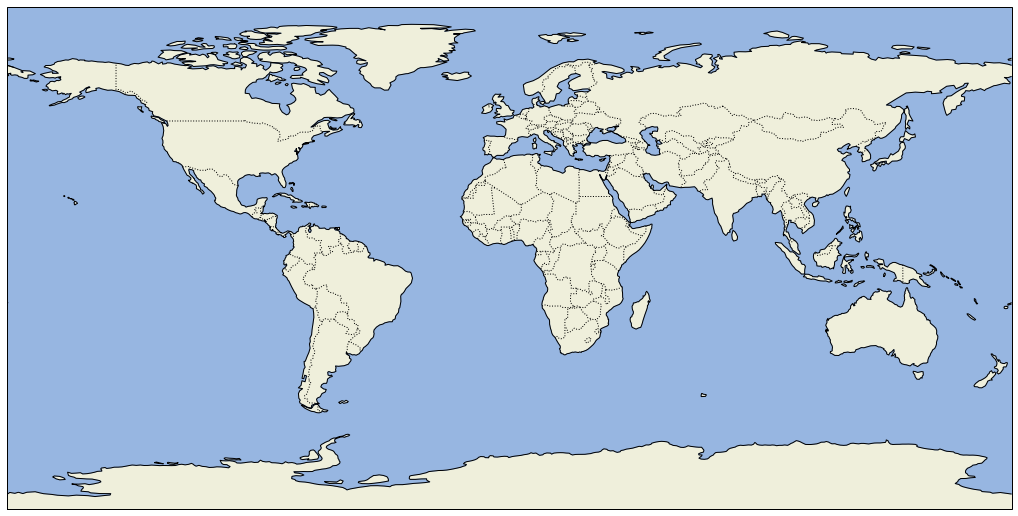

In [7]:
def make_figure():
    fig = plt.figure(figsize=(18, 13))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # generate a basemap with country borders, oceans and coastlines
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle='dotted')
    return fig, ax

make_figure();

In [8]:
area = ds.sel(lon=slice(68, 98), lat=slice(8, 38))
times = area.time

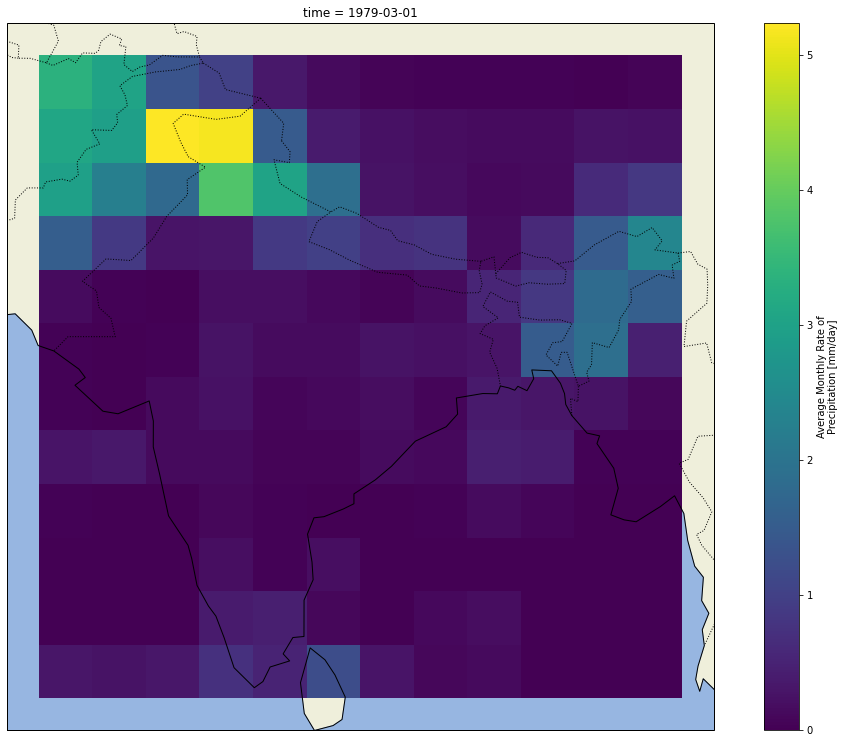

In [9]:
_, ax = make_figure()
# plot the temperature field
grid = area.sel(time=times[2]).precip
grid.plot(ax=ax, transform=ccrs.PlateCarree());

In [99]:
fig, ax = make_figure()

frames = area.time.size      # Number of frames
min_value = 0  # Lowest value
max_value = 10  # Highest value

def draw(frame, add_colorbar):
    grid = area.sel(time=times[frame]).precip
    contour = grid.plot(ax=ax, transform=ccrs.PlateCarree(),add_colorbar=add_colorbar, vmin=min_value, vmax=max_value)
    title = u"%s — %s" % (ds.lon[frame], str(area.time[frame].values)[:19])
    ax.set_title(title)
    return contour


def init():
    return draw(0, add_colorbar=True)


def animate(frame):
    return draw(frame, add_colorbar=False)


ani = animation.FuncAnimation(fig, animate, frames, interval=0.01, blit=False,init_func=init, repeat=False)
ani.save('fig.mp4', writer=animation.FFMpegWriter(fps=8))
plt.close(fig)

In [16]:
area = ds.isel(lon=slice(68, 98), lat=slice(8, 38))
area.precip.min

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 'precip' (time: 498, lat: 30, lon: 30)>
dask.array<getitem, shape=(498, 30, 30), dtype=float32, chunksize=(498, 30, 30), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -68.75 -66.25 -63.75 -61.25 ... -3.75 -1.25 1.25 3.75
  * lon      (lon) float32 171.25 173.75 176.25 178.75 ... 238.75 241.25 243.75
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-06-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.     47.3274]>